# Supermarket Sales Analysis 

The objective of this workbook is to use pandas, matplotlib and seaborn libraries to analyze a dataset on sales figures. 

The dataset we will be using is a historical sales dataset from a supermarket company in Myanmar. The original dataset can be found here: https://www.kaggle.com/aungpyaeap/supermarket-sales

For this analysis, we will be looking to answer some basic business questions and generate some insight that may be helpful for operations. We will approach this workbook in three distinct sections: 

#### 1) Data Cleaning & Formatting 
 - Understanding the format of our data, cleaning & formatting for useability. 
 
#### 2) Exploratory Data Analysis 
 - Understanding the distribution of our data
 - Basic summary statistics & correlations 
 
#### 3) Business & Operations Insights
 - A few questions to help us gain insight to our consumer and opportunities for improvement




## Data Cleaning & Formatting

 - Understanding the format of our data, cleaning & formatting for useability.

In [1]:
#Import necessary†i libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read in table, explore format

sales = pd.read_csv('supermarket_sales - Sheet1.csv')
sales.head(3)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [2]:
#Clean up column names for consistency 

new_cols = {}

for col in sales.columns:
    cleaned_col = col.lower().replace(" ", "_").replace('%','').replace("5", "incr")
    new_cols[col] = cleaned_col
    
sales = sales.rename(columns = new_cols)
sales.head(3)


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_incr,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [3]:
# Explore for datatypes, missing values etc. 

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer_type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product_line             1000 non-null   object 
 6   unit_price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax_incr                 1000 non-null   float64
 9   total                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

#### Changing column datatypes 

Looks like this dataset has been cleaned already - perfect! Note this won't always be the case, in such a scenario we would be required to clean and assess what to do with missing / imperfect values etc. 

Let's change some of our columns to a better suited datatype (datetime, category). 


In [4]:
#Datetime conversion 

sales['date_time'] = sales['date'] + " " + sales['time']
sales['date_time'] = pd.to_datetime(sales['date_time'])

#Convert applicable columns to category type for ease of use, efficient memory storage

category_columns = ['branch', 'city', 'customer_type', 'gender', 'product_line', 'payment']

sales[category_columns] = sales[category_columns].astype('category')
sales['gross_margin_percentage'] = sales['gross_margin_percentage'] / 100

#Dropping separate 'Date' and "time" columns since we now have one aggregate date_time column
sales.drop(columns = ['date', 'time'], inplace = True)

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   category      
 2   city                     1000 non-null   category      
 3   customer_type            1000 non-null   category      
 4   gender                   1000 non-null   category      
 5   product_line             1000 non-null   category      
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_incr                 1000 non-null   float64       
 9   total                    1000 non-null   float64       
 10  payment                  1000 non-null   category      
 11  cogs                     1000 non-null   float64       
 12  gross_margin_percentage  1000 non-n

In [5]:
sales.describe()

,unit_price,quantity,tax_incr,total,cogs,gross_margin_percentage,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e-02,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,7.914297e-16,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e-02,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e-02,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e-02,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e-02,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e-02,49.650000,10.00000


In [6]:
sales['gross_margin_percentage'].unique()

array([0.04761905])

##### Dropping columns that don't add value

It looks like the gross margin percentage is uniform across all records. While we can note it down, it doesn't offer us much use to keep the column in the dataframe.

The same logic would then extend to gross_income, cogs, and tax_incr columns. As gross margin and the tax rate are constant in this dataset (something that isn't always the case), we won't garner any further insight by analyzing them. They are simply straight percentages taken off of our total columns. 

We will take note that the incremental tax rate is 5%, the gross margin for all products is ~4%, and then drop these columns from our table to make it easier to manage. 


In [7]:
sales.drop(columns = ['gross_margin_percentage', 'tax_incr', 'cogs', 'gross_income'], inplace = True)
sales.head(5)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,total,payment,rating,date_time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,Ewallet,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,Cash,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,Credit card,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,Ewallet,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,Ewallet,5.3,2019-02-08 10:37:00


## Exploratory Data Analysis 

Now that our data is in a manageable format, let's get a better idea of it's shape and a few of it's basic characteristics. 

Here we will get an understanding of our the following: 
 - Distribution 
 - Mean
 - Correlations 
 
Where applicable, we will visualize our data for ease of understanding. We will start by visualizing the relative frequency of our categorical data. 



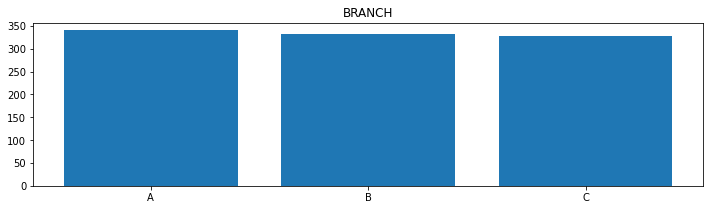

A    340
B    332
C    328
Name: branch, dtype: int64


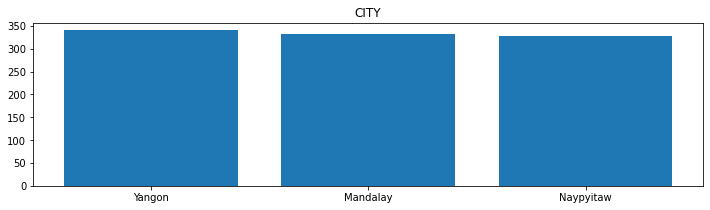

Yangon       340
Mandalay     332
Naypyitaw    328
Name: city, dtype: int64


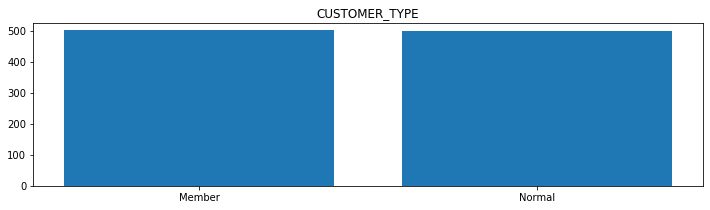

Member    501
Normal    499
Name: customer_type, dtype: int64


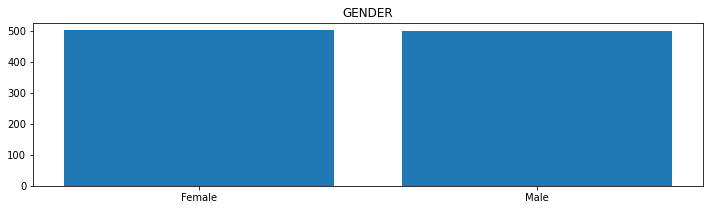

Female    501
Male      499
Name: gender, dtype: int64


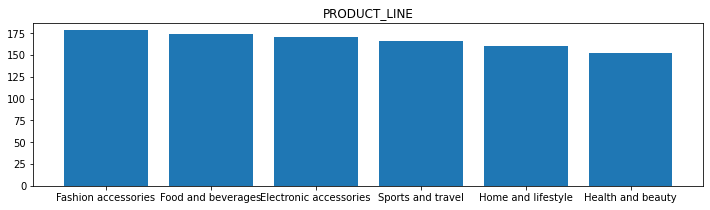

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: product_line, dtype: int64


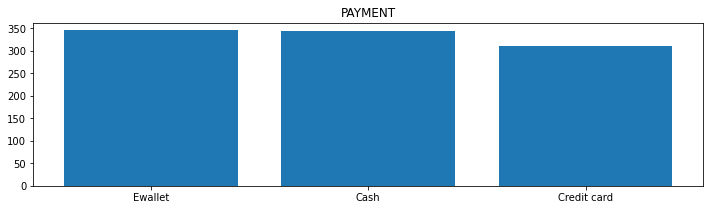

Ewallet        345
Cash           344
Credit card    311
Name: payment, dtype: int64


In [8]:
# Start with the categorical data
cat_cols  = sales.select_dtypes(include = ['category']).columns

# Create dictionary with value counts for each categorical column in our dataset
value_frequency_dict = {col: sales[col].value_counts() for col in cat_cols}

#Define function that plots each dictionary 
def plot_dict(key):
    plt.figure(figsize = [12,3])
    plt.bar(value_frequency_dict[key].keys(), value_frequency_dict[key])
    plt.title(str(key).upper())
    plt.show()
    print(value_frequency_dict[key])
        
for key in value_frequency_dict: 
    plot_dict(key) 

Looking at the charts above briefly, we can generally say that there is an even split for most categories. For Product Line and Payment we can see some slight differences, though it is encouraging to know there aren't any categories where one type dominates the data. 

While an even data split may be good for predictive modelling, it doesn't give us any immediate business insight or glaring areas to investigate. 

Let's quickly dive into Payment and Product Line data

In [9]:
print('Payment Type - Percentage Split')
print(sales['payment'].value_counts(normalize = True))
print('\n')
print('Product Line - Percentage Split')
print(sales['product_line'].value_counts(normalize = True))

Payment Type - Percentage Split
Ewallet        0.345
Cash           0.344
Credit card    0.311
Name: payment, dtype: float64


Product Line - Percentage Split
Fashion accessories       0.178
Food and beverages        0.174
Electronic accessories    0.170
Sports and travel         0.166
Home and lifestyle        0.160
Health and beauty         0.152
Name: product_line, dtype: float64


From a payment type perspective, credit card is the least popular, though the difference between all three options is minimal. If a bigger gap existed it would be interesting to dig deeper into why. For our purposes the small gap may be due in part to random noise, so we will move on for now.  

For the various product categories, we start to see a more pronounced (albeit still tight) rank order of popular items. Fashion Accessories accounts for almost 18% of orders, while Health and Beauty accounts for 15% (a difference of ~14% between the two). While this difference is small, it would be something to keep in mind when allocating shelf-space for innovation items etc. 

Let's take a quick look at how our numerical data is distributed before we start answering some business-oriented questions. 

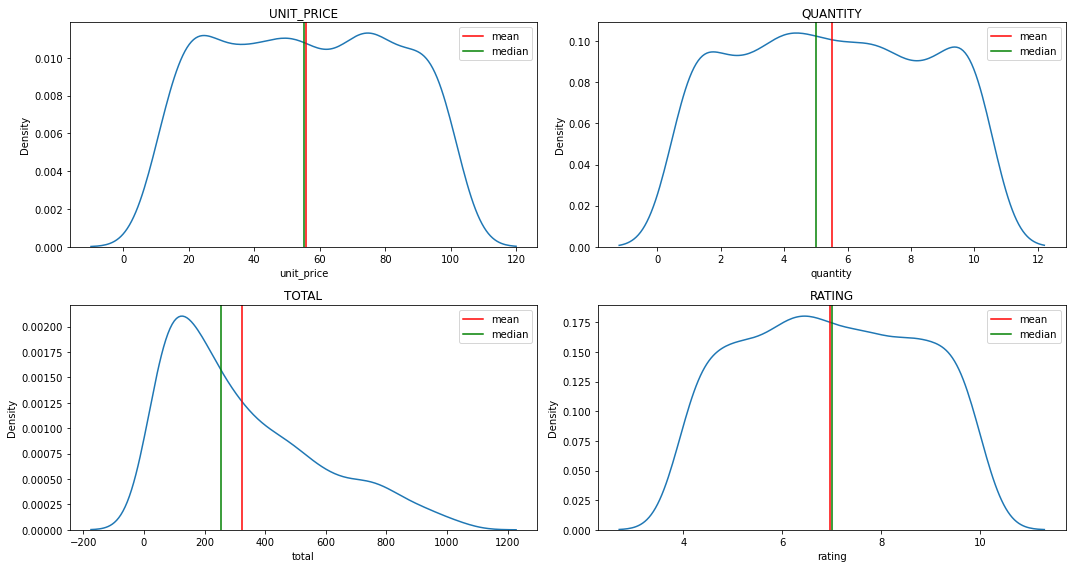

In [10]:
# Select numeric columns
numeric_cols = sales.select_dtypes(include=['float', 'int']).columns

# Set figure size
plt.figure(figsize = [15,8])

# Loop through numeric columns list, create subplot & format 
for num, col in enumerate(numeric_cols):
    plt.subplot(2,2,(num +1))
    sns.kdeplot(sales[col])
    plt.axvline(sales[col].mean(), ymax = 1, ymin = 0, color = 'red', label = 'mean')
    plt.axvline(sales[col].median(), ymax = 1, ymin = 0, color = 'green', label = 'median')
    plt.legend()
    plt.title(str(col).upper())

plt.tight_layout()   
plt.show() 
    

##### Looking at the distribution of our numeric data: Price, Quantity, Total, and Rating
Let's take a quick look at our plots: 

**Unit Price**
 - Resembles a heavily platykurtic (flat / uniform looking top) normal distribution. 
 - Unit prices between a range of roughly $20 - $90 are more or less uniformly distributed.
     - ***Takeaway: Customers aren't put off by higher price tags, something we will dive into by category.*** 
 
**Quantity**
- Similar to Unit Price - resembles a heavily platykurtic (flat / uniform looking top) normal distribution. 
- Purchase quantity between ~2 and ~9 items is more or less evenly distributed.        
    - ***Takeaway: Customers seem just as likely to purchase 1 item as 9 items. We will explore how quantity and unit_price relate to one another.***
        
**Total** 
- Interestingly, the Total for customers is more normally distributed with a heavy right skew. Ignoring some negative bills (refunds presumably), it looks like the modal total bill ends up around ~175, with a caveat to say that many customer totals are significantly larger than that.

- Combining this graph with what we know about the Unit Price and Quantity distributions, it appears as though there is a balance between customers who purchase many small ticket items, and customers who purchase few large ticket items. 

    - ***Takeaway: With what we know about Quantity and Unit Price tendencies, we can intuit that there are two separate customer segments; one that buys many small ticket items, and one that buys few large ticket items.*** 
    - ***Marketing / promotional strategies should dig deeper to validate these two groups and assess where investments should be made to increase sales (i.e. focus on building quantity per shopper, or focus on building basket price per shopper)***.  

**Rating**

- Similar to Unit Price and Quantity, resembles a heavily platykurtic (flat / uniform looking top) normal distribution. 
    - ***Takeaway: There is a large portion of the customer base that doesn't view their purchases favorably at the moment. Assuming higher ratings lead to repeat / future purchases, a focus on increasing ratings could be an avenue to increase sales.*** 


## Business & Operations Insights

Now that we have a rough understanding of our data and business fundamentals, let's see if we can answer some additional business questions. Note that depending on the business context, there are many more questions we could dive into. For now, we will stick more or less high level with the following:  

- Is the behaviour of members vs non-members different?
- Does a particular payment type dictate a certain purchasing pattern?
- Is there a certain time of day that is most popular? For which categories?
- Is rating correlated with purchase total?
- How have stores performed over time?

#### Members vs Non-Members

To get a better understanding, we will plot the distribution of each segment against several variables. 

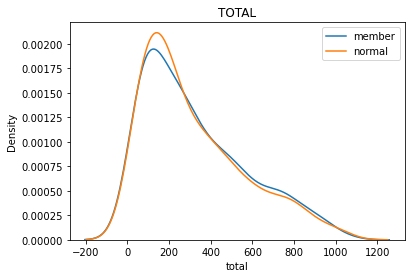

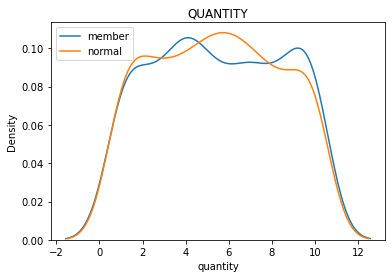

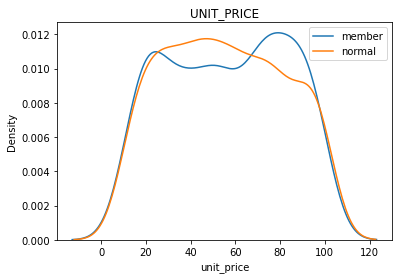

,unit_price,quantity,total,rating
customer_type,,,,
Member,56.206986,5.558882,327.791305,6.940319
Normal,55.135130,5.460922,318.122856,7.005210


In [11]:
# Create mask for different each customer type, list of columns we want to assess 
member_mask = sales['customer_type'] == 'Member'
normal_mask = sales['customer_type'] == 'Normal'
columns = ['total', 'quantity', 'unit_price']

# Loop through columns & plot 
for col in columns: 
    sns.kdeplot(sales.loc[member_mask, col], label = 'member')
    sns.kdeplot(sales.loc[normal_mask, col], label = 'normal')
    plt.title(col.upper())
    plt.legend()
    plt.show()

# Group By customer type for summary statistics
member_non_member = sales.groupby('customer_type').mean()
member_non_member.head()


Looking at Members vs Non-members, some concerning patterns (or lack thereof) start to emerge. Notably, ***there appears to be no significant difference in total dollars spent between members and non-members*** Having previously discovered that our customer base is roughly split evenly between members and non-members, this clearly shows that our loyalty / membership program is likely failing to deliver it's business objectives. For the (unknown) cost to run the program, it is unclear what return is being generated. 


#### Difference between Payment types
Let's now understand if a particular payment type dictates certain purchasing behaviours

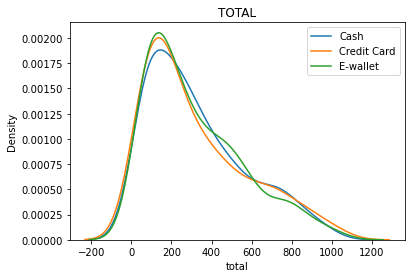

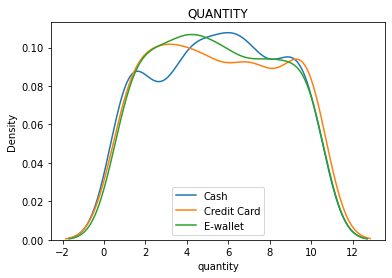

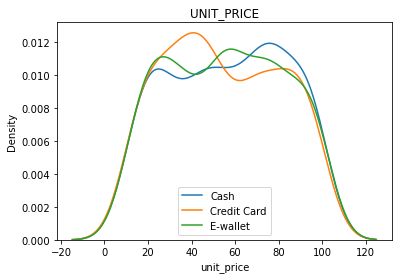

,unit_price,quantity,total,rating
payment,,,,
Cash,56.758983,5.511628,326.181890,6.970058
Credit card,54.394469,5.536977,324.009878,7.003215
Ewallet,55.740174,5.484058,318.820600,6.947826


In [12]:
# Create masks, list of cols, plot via loop

cash_mask = sales['payment'] == 'Cash'
credit_mask = sales['payment'] == 'Credit card'
ewallet_mask = sales['payment'] == 'Ewallet'

for col in columns: 
    sns.kdeplot(sales.loc[cash_mask, col], label = 'Cash')
    sns.kdeplot(sales.loc[credit_mask, col], label = 'Credit Card')
    sns.kdeplot(sales.loc[ewallet_mask, col], label = 'E-wallet')
    plt.title(col.upper())
    plt.legend()
    plt.show()

payment_type = sales.groupby('payment').mean()
payment_type.head()

While some minor differences in our plots, it is difficult to derive any actionable insight from these metrics. At the moment, there doesn't appear to be any significant difference in behaviour between payment types. 

#### Most Popular Shopping Times
Is there a certain time of day that is most popular? What about for our top categories?

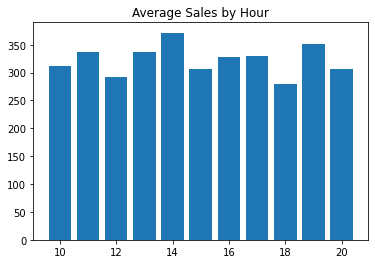

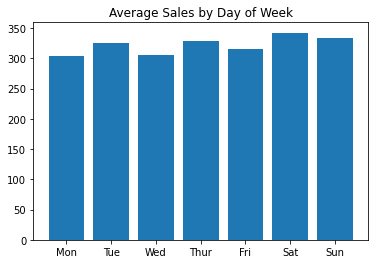

,day,unit_price,quantity,total,rating,hour
day_of_week,,,,,,
0,Mon,57.728000,5.104000,303.192624,7.153600,14.912000
1,Tue,54.837215,5.455696,325.836997,7.003165,14.974684
2,Wed,53.764685,5.594406,305.812133,6.805594,14.944056
3,Thur,56.959058,5.471014,328.617739,6.889855,14.550725
4,Fri,55.097266,5.453237,316.016838,7.076259,14.690647
5,Sat,56.913049,5.603659,342.200058,6.901829,15.201220
6,Sun,54.517970,5.849624,334.269868,7.011278,15.037594


In [13]:
# List for each hour & day our store is open    
sales['hour'] = [x.hour for x in sales['date_time']]
sales['day_of_week'] = [x.weekday() for x in sales['date_time']]

# Group By mean summary statistic & plot
group_hourly = sales.groupby('hour').mean()
group_day_week = sales.groupby('day_of_week').mean()
weekdays = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']

plt.bar(group_hourly.index, group_hourly['total'])
plt.title('Average Sales by Hour')
plt.show()

plt.bar(group_day_week.index, group_day_week['total'])
plt.title('Average Sales by Day of Week')
plt.xticks(ticks=group_day_week.index, labels=weekdays,)
plt.show()

#Add day names to table, reorder columns for ease of visual 
group_day_week['day'] = pd.Series(group_day_week.index).apply(lambda x: weekdays[x])
group_day_week = group_day_week[['day','unit_price', 'quantity', 'total', 'rating', 'hour']]
group_day_week.head(7)




As somewhat expected, weekend days are the most busy. Inventory management and shelf-stocking should prioritize these days. 

Looking at hours, we can visualize 3 loose shopping times where shopping is most popular: mid-morning, mid-afternoon, and post-dinner. Mid-afternoon and post-dinner times appear to be our most busy times. Staff scheduling and daily shelf-stocking should be in sync with these times in order to minimize stock-out situations during peak hours. 

#### Average Sales by Hour for our Top 3 Product Categories

For our top 3 product categories (as defined by purchase frequency for this exercise), let's explore if there is any critical time of day when they are purchased. 

In [14]:
group_hourly

,unit_price,quantity,total,rating,day_of_week
hour,,,,,
10,57.627525,5.198020,311.103772,7.098020,3.049505
11,56.807111,5.700000,337.525883,6.806667,2.877778
12,50.291573,5.629213,292.875084,7.300000,3.011236
13,54.361845,5.679612,337.118709,7.030097,3.213592
14,57.417470,5.963855,371.426494,6.934940,3.204819
15,53.740000,5.196078,305.681456,6.876471,2.764706
16,60.347403,5.454545,327.614591,6.859740,2.740260
17,56.817973,5.608108,330.340784,6.939189,3.027027
18,51.864301,5.107527,279.896129,7.187097,3.193548


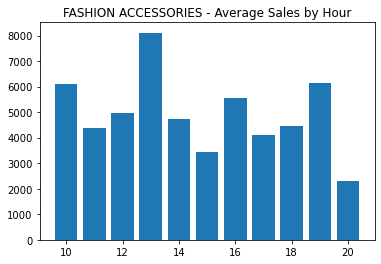

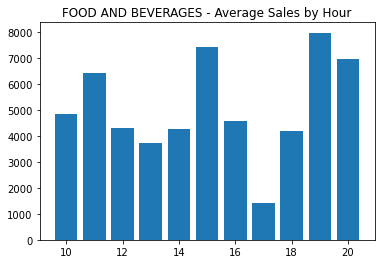

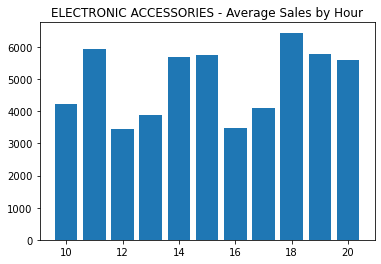

In [15]:
top_3_cat = sales['product_line'].value_counts(normalize = True)[0:3].index.to_list()
group_hourly_cat = sales.groupby(['product_line', 'hour']).sum()
group_hourly_cat.reset_index(inplace = True)

for category in top_3_cat: 
    mask = group_hourly_cat['product_line'] == category
    filtered_df = group_hourly_cat[mask]
    plt.bar(filtered_df['hour'], filtered_df['total'])
    plt.title('{cat} - Average Sales by Hour'.format(cat = category.upper()))
    plt.show()


Looking at our above charts, both Fashion Accessories and Electronics seem to be generally most popular in the afternoons, which likely aligns with weekend shopping habits. 

An interesting insight our graphs have revealed relates instead to our Food & Beverages category. Being likely perishable goods, keeping this section stocked and fresh is likely the greatest operational challenge. Looking at most popular shopping times, the mid-morning (~11:00am) hour is our most popular time by far. Prioritizing shelving and product availability for store opening should be top of mind. 

#### How have stores performed over time?

Let's take a look at sales trended over time, parsed out by branch. 

In [16]:
#Set date_time column as our index so we can resample later
sales = sales.set_index('date_time')


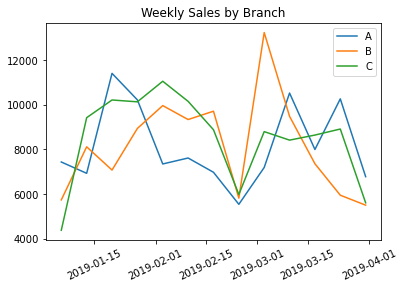

Monthly Sales by Branch
date_time  2019-01-31  2019-02-28  2019-03-31
branch                                       
A          38681.1285  29860.1205  37659.1215
B          37176.0585  34424.2710  34597.3425
C          40434.6810  32934.9825  37199.0430


In [17]:
#Groupby branch and resample data on a weekly period. 
gb_branch = sales.groupby('branch').resample("W").sum().reset_index()

#Plot weekly sales by branch on same plot
for br in gb_branch['branch'].unique():
    mask = gb_branch['branch'] == br
    filtered = gb_branch[mask]
    plt.plot(filtered['date_time'], filtered['total'], label = br)
    plt.legend()
    

plt.title('Weekly Sales by Branch')
plt.xticks(rotation = 25)
plt.show()

#Create table of monthly sales by branch
month_chart = sales.groupby('branch').resample("M").sum()
month_chart.reset_index(inplace = True)
print("Monthly Sales by Branch")
print(month_chart.pivot(index = 'branch', columns = 'date_time', values = 'total').head())


Looking at our branches, weekly volume appears extremely volatile. One commonality among all branches is a dismal week in mid-February. This would be something we would likely want to investigate further as a management team to determine root causes and prevent it from happening again. 

### Conclusion

The purpose of this workbook was to demonstrate skills related to common business analysis questions. Having analyzed our data we've been able to gain a few important insights - a deeper dive into weekly volume drivers is likely required, as well as a review of the loyalty program. That being said, the data we are working with is relatively limited. If this were a real-life scenario, the context of the business objective would ultimately determine next steps and actions to implement. 

Thanks for reading!



